In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

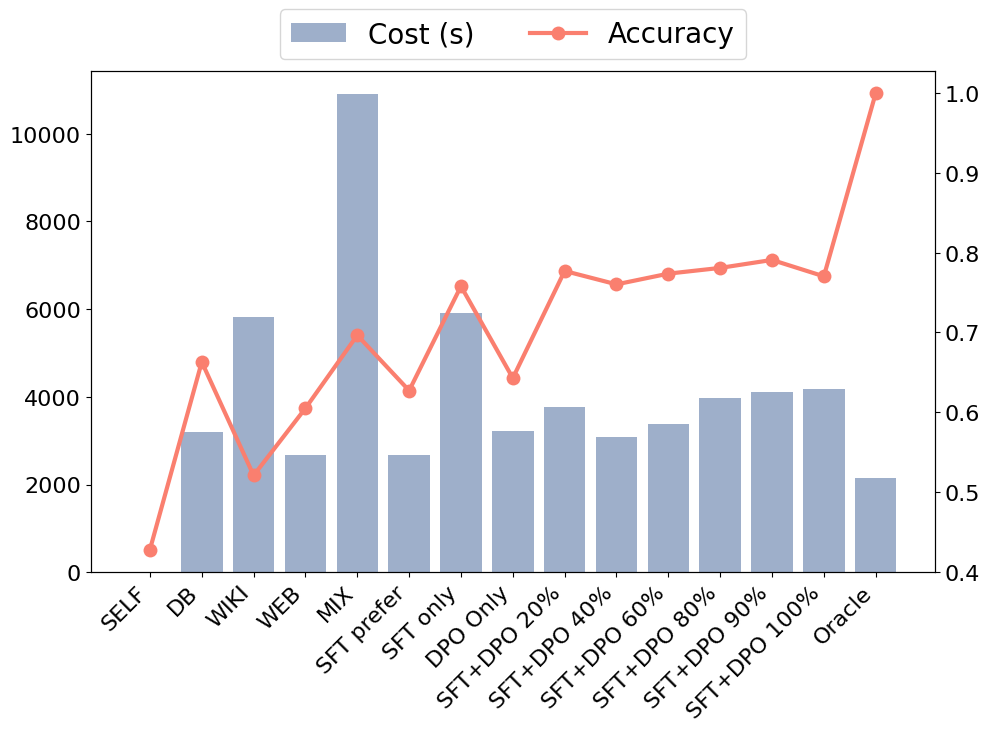

In [6]:
# methods = ['Self', 'DB', 'Wiki', 'WEB', 'Mix', 'SFT', 'Only DPO', 'DPO 0.1', 'DPO 0.2', 'DPO 0.4', 'DPO 0.6', 'DPO 0.8', 'DPO 1.0', 'Oracle']
methods = ['SELF', 'DB', 'WIKI', 'WEB', 'MIX', 'SFT prefer', 'SFT only', 'DPO Only', 'SFT+DPO 20%', 'SFT+DPO 40%', 'SFT+DPO 60%', 'SFT+DPO 80%', 'SFT+DPO 90%', 'SFT+DPO 100%', 'Oracle']
# cost-acc figure
# costs = [0, 3202, 5812, 2678.000 , 10894, 5902.540 , 3233, 4109.000, 3966.000, 3384, 3077, 3769, 4188, 2153]
costs = [0, 3202, 5812, 2678.000 , 10894, 2683.92524, 5902.540 , 3233, 3769, 3077, 3384, 3966.000, 4109.000, 4188, 2153]

# acc = [0.4277, 0.663, 0.5207, 0.605, 0.6965, 0.758, 0.64277, 0.791, 0.781, 0.773796, 0.760358, 0.77715, 0.77043, 1]
acc = [0.4277, 0.663, 0.5207, 0.605, 0.6965, 0.627099, 0.758, 0.64277, 0.77715, 0.760358, 0.773796, 0.781, 0.791, 0.77043, 1]

# 创建成本和分数的DataFrame
df_cost_acc = pd.DataFrame({
    'Methods': methods,
    'Cost': costs,
    'Accuracy': acc
})

# 第一个图：成本和分数对比图
plt.figure(figsize=(10, 8))
ax1 = plt.gca()
plt.rcParams['axes.grid'] = False  # 禁用全局网格线

# 柱状图（成本）
sns.barplot(x='Methods', y='Cost', data=df_cost_acc, color='#6a8bbf', alpha=0.7, ax=ax1, label='Cost (s)', width=0.8)
# ax1.set_ylabel('Cost', fontsize=18)
ax1.set_ylabel('', fontsize=18)
ax1.set_xlabel('', fontsize=18)
ax1.tick_params(axis='both', labelsize=16)

# 折线图（分数）
ax1_2 = ax1.twinx()
sns.lineplot(x='Methods', y='Accuracy', data=df_cost_acc, color='#FA7F6F', marker='o', markeredgecolor='none', markersize=10, ax=ax1_2, label='Accuracy', legend=False, linewidth=3)
# ax1_2.set_ylabel('Accuracy', fontsize=18)
ax1_2.set_ylabel('', fontsize=18)
ax1_2.tick_params(axis='y', labelsize=16)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=20, ncol=2)

# 设置标题
# ax1.set_title('Cost and Score Comparison of Different Methods', fontsize=18, pad=30)

# 设置横坐标文字旋转
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# 调整布局，增加顶部空间
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 保存第一个图
plt.savefig('cost_acc_comparison.png', bbox_inches='tight', dpi=500)

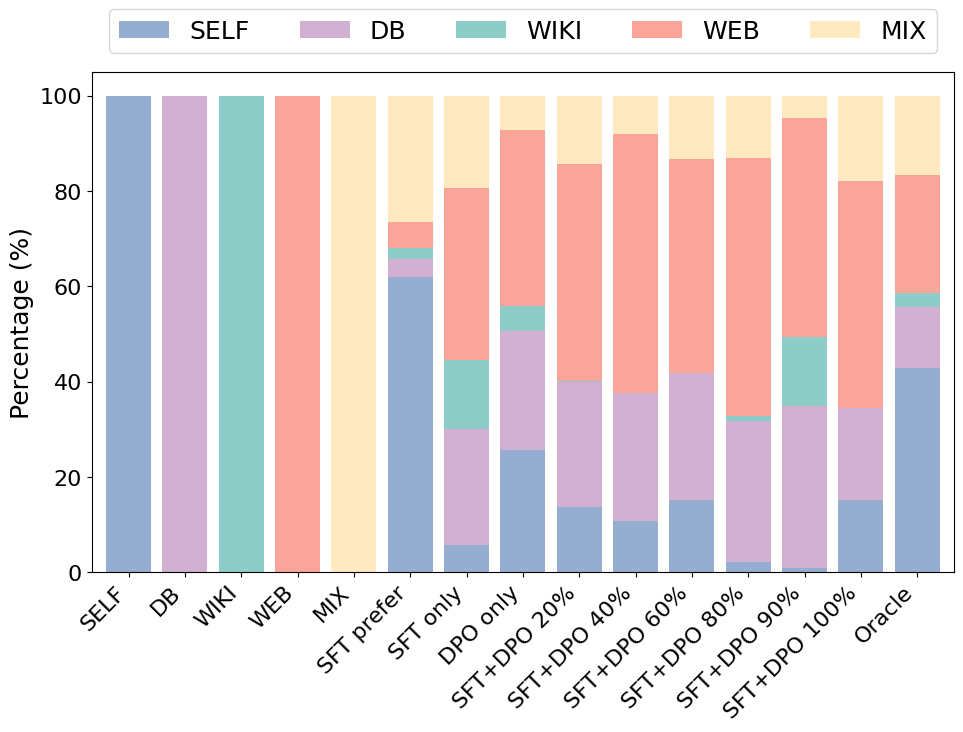

In [7]:
# 示例数据：不同方案在不同数据源上的分布
# data_sources = ['DB', 'Wiki', 'Mix', 'Web', 'Self']
data_sources = ['SELF', 'DB', 'WIKI', 'WEB', 'MIX']
distribution_data = {
    'SELF': [893, 0, 0, 0, 0],  # 'DB', 'Wiki', 'Mix', 'Web', 'Self'
    'DB': [0, 893, 0, 0, 0],
    'WIKI': [0, 0, 893, 0, 0],
    'WEB': [0, 0, 0, 893, 0],
    'MIX': [0, 0, 0, 0, 893],
    'SFT prefer': [553, 35, 19, 50, 236],
    'SFT only': [52, 216, 130, 322, 173],
    # 'Only DPO': [18, 140, 13, 459, 276],
    # 'Only DPO': [15, 25, 0, 435, 418],
    'DPO only': [230, 223, 46, 329, 65],
    'SFT+DPO 20%': [122, 234, 2, 407, 128],
    'SFT+DPO 40%': [97, 239, 0, 485, 72], 
    'SFT+DPO 60%': [135, 239, 0, 401, 118],
    'SFT+DPO 80%': [19, 265, 9, 484, 116],
    'SFT+DPO 90%': [9, 302, 130, 410, 42],
    'SFT+DPO 100%': [135, 173, 0, 426, 159],
    'Oracle': [382, 116, 26, 221, 148]
}

for key, data in distribution_data.items():
    assert np.sum(data) == 893
    data = [x / 893 * 100 for x in data]
    distribution_data[key] = data

# 创建分布数据的DataFrame
df_distribution = pd.DataFrame(distribution_data, index=data_sources)

# 第二个图：不同方案在不同数据源上的分布图
plt.figure(figsize=(10, 8))
ax2 = plt.gca()

# 设置横坐标文字斜着
# colors = ['#82B0D2', '#BEB8DC', '#8ECFC9', '#FA7F6F', '#FFBE7A', '#E7DAD2', '#999999',]
# colors = ['#b499ba', '#b0b9d0', '#a6d3d1', '#bee9c0', '#fef5a7']
# colors = ['#b499ba', '#b0b9d0', '#a6d3d1', '#bee9c0', '#FFD6A6']
# colors = ['#82B0D2', '#BEB8DC', '#8ECFC9', '#FA7F6F', '#FFD6A6']
colors = ['#6a8bbf', '#bf8fbf', '#5fb8b0', '#FA7F6F', '#FFE0A6']    
df_distribution.T.plot(kind='bar', stacked=True, ax=ax2, color=colors, width=0.8, alpha=0.7)
ax2.set_ylabel('Percentage (%)', fontsize=18)
ax2.set_xlabel('', fontsize=18)
# ax2.set_title('Distribution of Methods Across Data Sources', fontsize=18, pad=30)
ax2.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5, fontsize=18)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.tick_params(axis='both', labelsize=16)

# 调整布局，增加顶部空间
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 保存第二个图
plt.savefig('distribution_comparison.png', bbox_inches='tight', dpi=500)

In [5]:
def plot_heatmap(domain_data, tasks_data, fig_name):
    # 示例数据
    n, m, k = 5, 6, 7  # 行数为 n，第一个热力图列数为 m，第二个热力图列
    
    fig_length=6
    
    methods = ['Llama3', 'ER-RAG (DB)', 'A-ICL', 'P-ICL', 'w/o P']
    if fig_name == 'DB':
        methods[1] = 'DB'
    elif fig_name == 'Wiki':
        methods[1] = 'Wiki'
        n = 6
        methods.append('E-ICL')
        fig_length=7
    elif fig_name == 'Web':
        methods[1] = 'Web'
        n = 6
        methods.append('E-ICL')
        fig_length=7
        
    domains = ['Movie', 'Music', 'Finance', 'Sports', 'Open', 'All']
    # tasks = ['Aggregation', 'Simple', 'Post-Processing', 'Set', 'Comparison', 'Simple_W_Condition', 'Multi-Hop']
    tasks = ['Agg.', 'Simple', 'PP.', 'Set', 'Comp.', 'SWC.', 'M-Hop.']
    
    plt.style.use('default')
    sns.set_style("whitegrid")
    
    # # 设置图形大小
    # plt.figure(figsize=(10, 6))
    
    # 创建自定义的蓝色调色板
    colors = sns.color_palette("YlGnBu", as_cmap=True)

    # 创建图形和子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, fig_length), gridspec_kw={'width_ratios': [m, k]})

    # 绘制第一个热力图
    domain_df = pd.DataFrame(domain_data, index=methods, columns=domains)
    sns.heatmap(domain_df, 
                ax=ax1,
                annot=True,  # 显示数值
                fmt='.2f',   # 数值格式
                cmap=colors,  # 使用蓝色调色板
                cbar=False,  # 隐藏颜色条
                square=True,  # 设置为False以使块更紧凑
                vmin=0.1,  # 最小值为0.1
                vmax=0.65,  # 最大值为0.7
                annot_kws={'size': 20, 'weight': 'bold'},  # 调整数字大小和粗细
                linewidths=0.,  # 添加网格线
                linecolor='white')
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=17)
    ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=18)
    # ax1.set_ylabel('Methods', fontsize=16)  # 共用行标签
    # ax1.set_xlabel('Domains', fontsize=16)  # 第一个热力图的列标签

    # # 绘制第二个热力图
    tasks_df = pd.DataFrame(tasks_data, index=methods, columns=tasks)
    sns.heatmap(tasks_df, 
                ax=ax2,
                annot=True,  # 显示数值
                fmt='.2f',   # 数值格式
                cmap=colors,  # 使用蓝色调色板
                cbar=False,  # 隐藏颜色条
                square=True,  # 设置为False以使块更紧凑
                vmin=0.1,  # 最小值为0.1
                vmax=0.65,  # 最大值为0.7
                annot_kws={'size': 20, 'weight': 'bold'},  # 调整数字大小和粗细
                linewidths=0.,  # 添加网格线
                linecolor='white')
    ax2.set_yticks([])  # 隐藏第二个热力图的 y 轴刻度
    # ax2.set_xlabel('Question types', fontsize=16)  # 第二个热力图的列标签
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=17)

    # 调整布局
    plt.tight_layout()
    plt.savefig(fig_name + '_heatmap.png', bbox_inches='tight', dpi=500)
    plt.show()
    
# plot_heatmap()

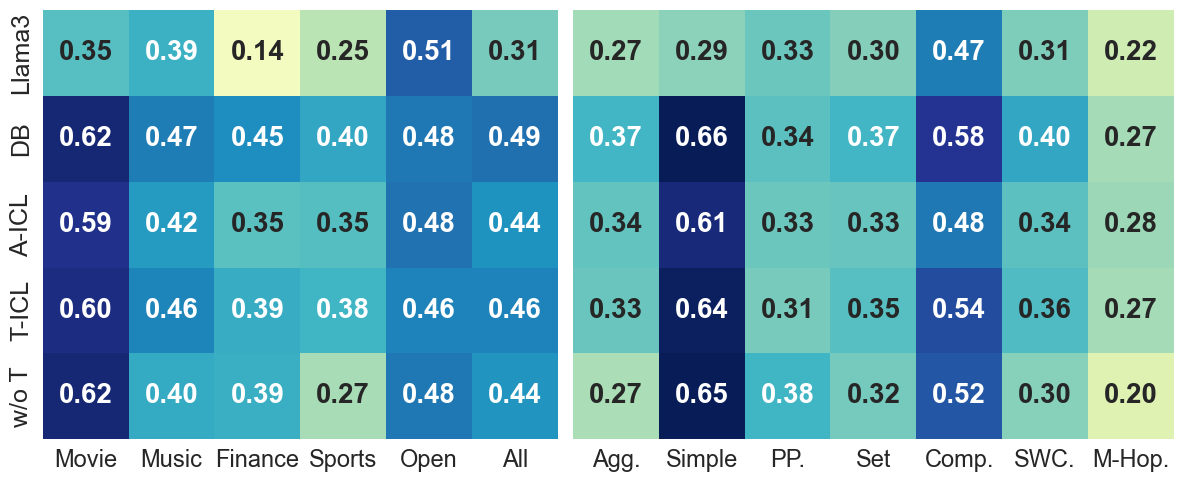

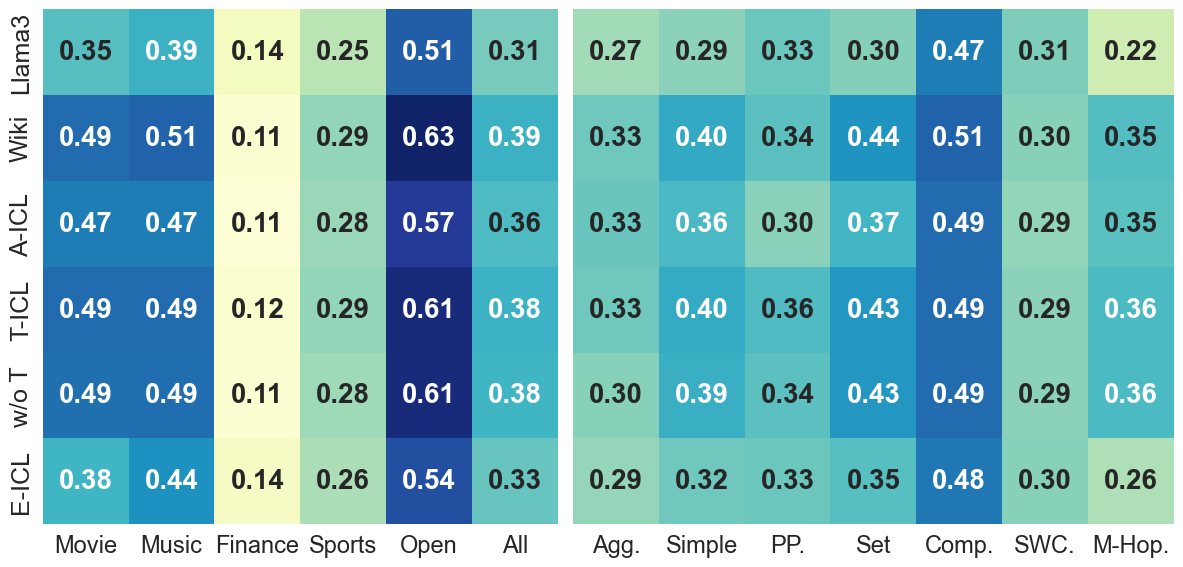

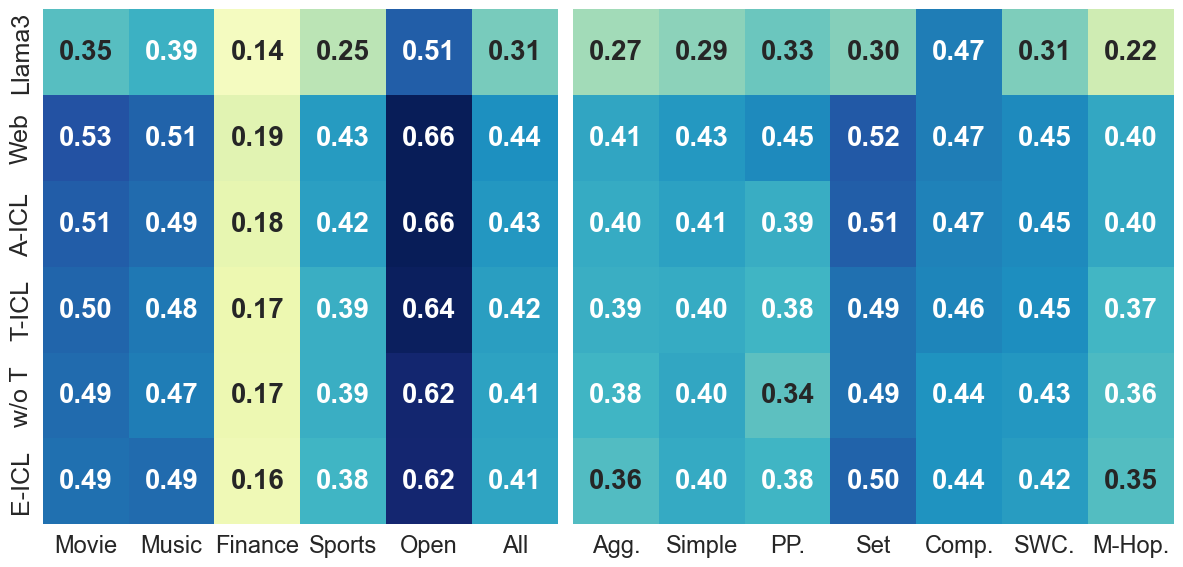

In [6]:
db_domain_data = [
    [0.351,	0.385, 0.145, 0.250, 0.511,	0.314],
    [0.617, 0.471, 0.448, 0.403, 0.476, 0.487],
    [0.591, 0.425, 0.347, 0.352, 0.485, 0.441], 
    [0.602, 0.460, 0.394, 0.375, 0.463, 0.461],
    [0.616, 0.397, 0.388, 0.269, 0.476, 0.437],
]
db_tasks_data = [
    [0.273, 0.294, 0.328, 0.301, 0.471,	0.308, 0.224],
    [0.374,	0.658, 0.344, 0.374, 0.582,	0.403, 0.271],
    # [0.329, 0.694, 0.344, 0.333, 0.553, 0.418, 0.243],
    [0.338, 0.613, 0.328, 0.333, 0.476, 0.343, 0.280],
    [0.331, 0.641, 0.313, 0.350, 0.541, 0.358, 0.271],
    [0.265, 0.651, 0.375, 0.317, 0.524, 0.299, 0.196],
]

plot_heatmap(db_domain_data, db_tasks_data, 'DB')


wiki_domain_data = [
    [0.351, 0.385, 0.145, 0.250, 0.511, 0.314],
    [0.495, 0.506, 0.114, 0.287, 0.629, 0.385],
    [0.470, 0.471, 0.107, 0.282, 0.572, 0.361],
    [0.495, 0.494, 0.120, 0.287, 0.611, 0.383],
    [0.487, 0.489, 0.114, 0.278, 0.611, 0.376],
    [0.376, 0.443, 0.136, 0.264, 0.537, 0.333]
]

wiki_tasks_data = [
    [0.273, 0.294, 0.328, 0.301, 0.471, 0.308, 0.224],
    [0.325, 0.400, 0.344, 0.439, 0.506, 0.299, 0.355],
    [0.331, 0.365, 0.297, 0.374, 0.494, 0.289, 0.346],
    [0.325, 0.397, 0.359, 0.431, 0.494, 0.294, 0.364],
    [0.299, 0.390, 0.344, 0.431, 0.494, 0.294, 0.364],
    [0.286, 0.324, 0.328, 0.350, 0.476, 0.299, 0.262],
]

plot_heatmap(wiki_domain_data, wiki_tasks_data, 'Wiki')


web_domain_data = [
    [0.351, 0.385, 0.145, 0.250, 0.511, 0.314],
    [0.530, 0.506, 0.192, 0.426, 0.659, 0.444],
    [0.513, 0.494, 0.180, 0.417, 0.655, 0.433],
    [0.502, 0.477, 0.170, 0.389, 0.642, 0.418],
    [0.495, 0.471, 0.167, 0.389, 0.624, 0.412],
    [0.487, 0.494, 0.161, 0.375, 0.620, 0.408]
]

web_tasks_data = [
    [0.273, 0.294, 0.328, 0.301, 0.471, 0.308, 0.224],
    [0.406, 0.430, 0.453, 0.520, 0.471, 0.453, 0.402],
    [0.396, 0.415, 0.391, 0.512, 0.465, 0.453, 0.402],
    [0.390, 0.395, 0.375, 0.488, 0.459, 0.448, 0.374],
    [0.377, 0.403, 0.344, 0.488, 0.441, 0.433, 0.364],
    [0.357, 0.397, 0.375, 0.504, 0.441, 0.423, 0.355]
]

plot_heatmap(web_domain_data, web_tasks_data, 'Web')


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_heatmap_vertical(domain_data, tasks_data, fig_name):
    # 示例数据
    n, m, k = 5, 6, 7  # 行数为 n，第一个热力图列数为 m，第二个热力图列
    fig_height = 6
    methods = ['Llama3', 'ER-RAG (DB)', 'A-ICL', 'T-ICL', 'w/o T']
    if fig_name == 'DB':
        methods[1] = 'DB'
    elif fig_name == 'Wiki':
        methods[1] = 'Wiki'
        n = 6
        methods.append('E-ICL')
        fig_height=7
    elif fig_name == 'Web':
        methods[1] = 'Web'
        n = 6
        methods.append('E-ICL')
        fig_height = 7
        
    domains = ['Movie', 'Music', 'Finance', 'Sports', 'Open', 'All']
    # tasks = ['Aggregation', 'Simple', 'Post-Processing', 'Set', 'Comparison', 'Simple_W_Condition', 'Multi-Hop']
    
    tasks = ['Agg.', 'Simple', 'PP.', 'Set', 'Comp.', 'SWC.', 'Multi-Hop']
    
    plt.style.use('default')
    sns.set_style("whitegrid")
    
    # # 设置图形大小
    # plt.figure(figsize=(10, 6))
    
    # 创建自定义的蓝色调色板
    colors = sns.color_palette("YlGnBu", as_cmap=True)

    # 创建图形和子图
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_height, 12), gridspec_kw={'height_ratios': [m, k]})

    # 绘制第一个热力图
    domain_df = pd.DataFrame(domain_data, index=domains, columns=methods)
    sns.heatmap(domain_df, 
                ax=ax1,
                annot=True,  # 显示数值
                fmt='.2f',   # 数值格式
                cmap=colors,  # 使用蓝色调色板
                cbar=False,  # 隐藏颜色条
                square=True,  # 设置为False以使块更紧凑
                vmin=0.1,  # 最小值为0.1
                vmax=0.65,  # 最大值为0.7
                annot_kws={'size': 18, 'weight': 'bold'},  # 调整数字大小和粗细
                linewidths=0.,  # 添加网格线
                linecolor='white')
    ax1.set_xticks([])  # 隐藏第一个热力图的 x 轴刻度
    # ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14, rotation=45)
    ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=18, rotation=0)
    # ax1.set_ylabel('Methods', fontsize=16)  # 共用行标签
    # ax1.set_xlabel('Domains', fontsize=16)  # 第一个热力图的列标签

    # # 绘制第二个热力图
    tasks_df = pd.DataFrame(tasks_data, index=tasks, columns=methods)
    sns.heatmap(tasks_df, 
                ax=ax2,
                annot=True,  # 显示数值
                fmt='.2f',   # 数值格式
                cmap=colors,  # 使用蓝色调色板
                cbar=False,  # 隐藏颜色条
                square=True,  # 设置为False以使块更紧凑
                vmin=0.1,  # 最小值为0.1
                vmax=0.65,  # 最大值为0.7
                annot_kws={'size': 18, 'weight': 'bold'},  # 调整数字大小和粗细
                linewidths=0.,  # 添加网格线
                linecolor='white')
    ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=18, rotation=0)
    # ax2.set_xlabel('Question types', fontsize=16)  # 第二个热力图的列标签
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=18)

    # 调整布局
    plt.tight_layout()
    plt.savefig(fig_name + '_heatmap_vertical.png', bbox_inches='tight', dpi=500)
    # plt.savefig(fig_name + '_heatmap_vertical.pdf')
    plt.show()
    
# plot_heatmap()

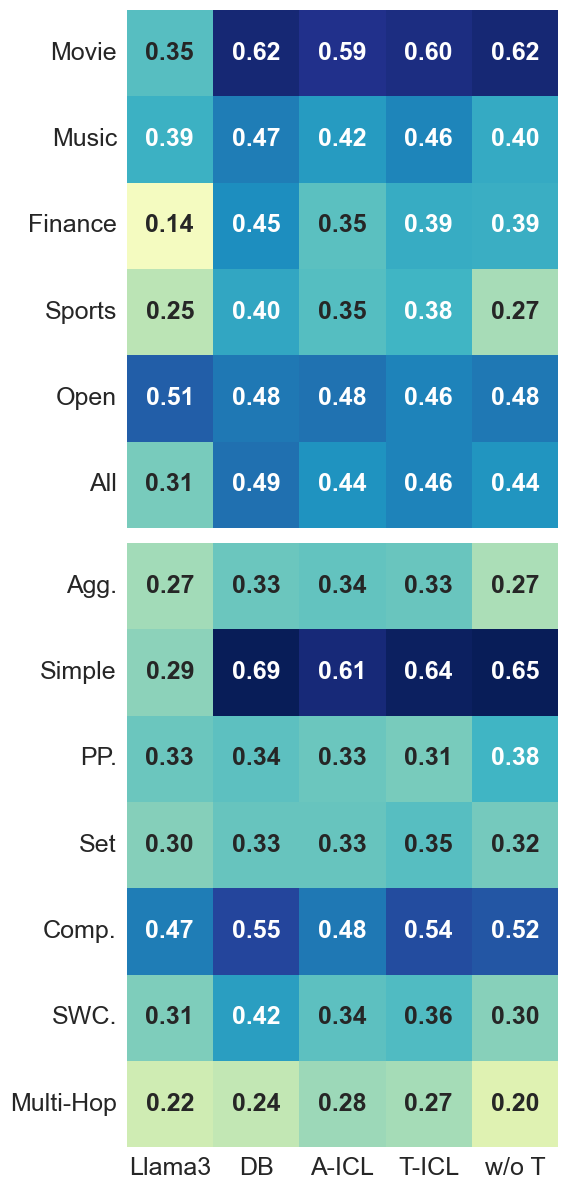

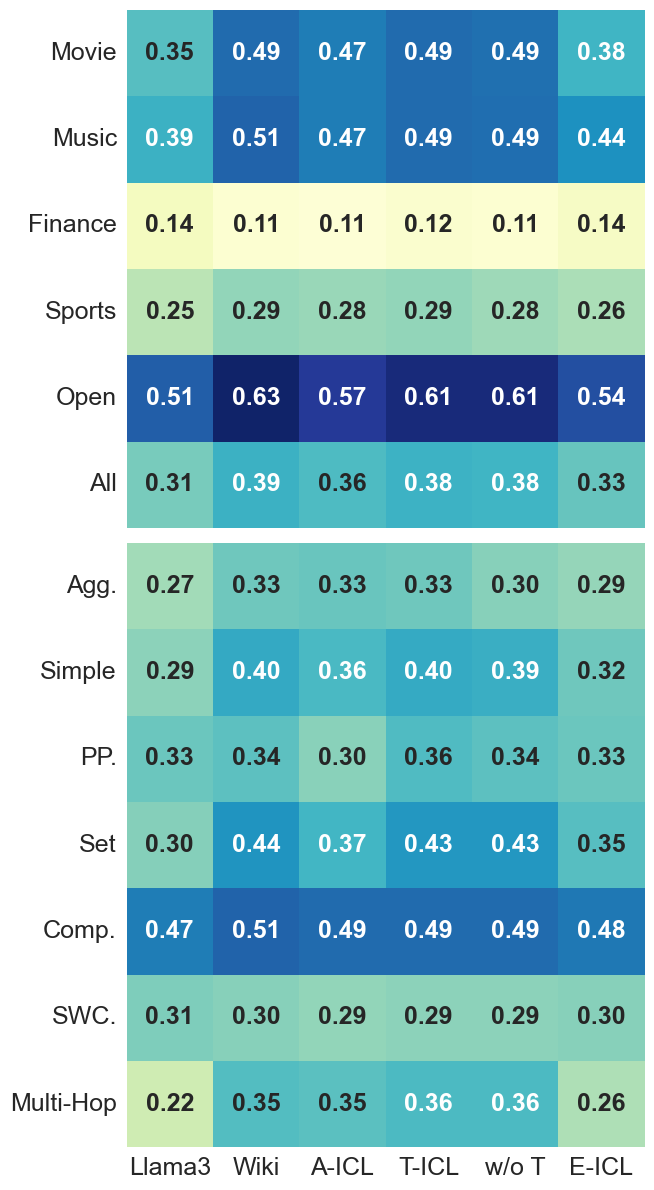

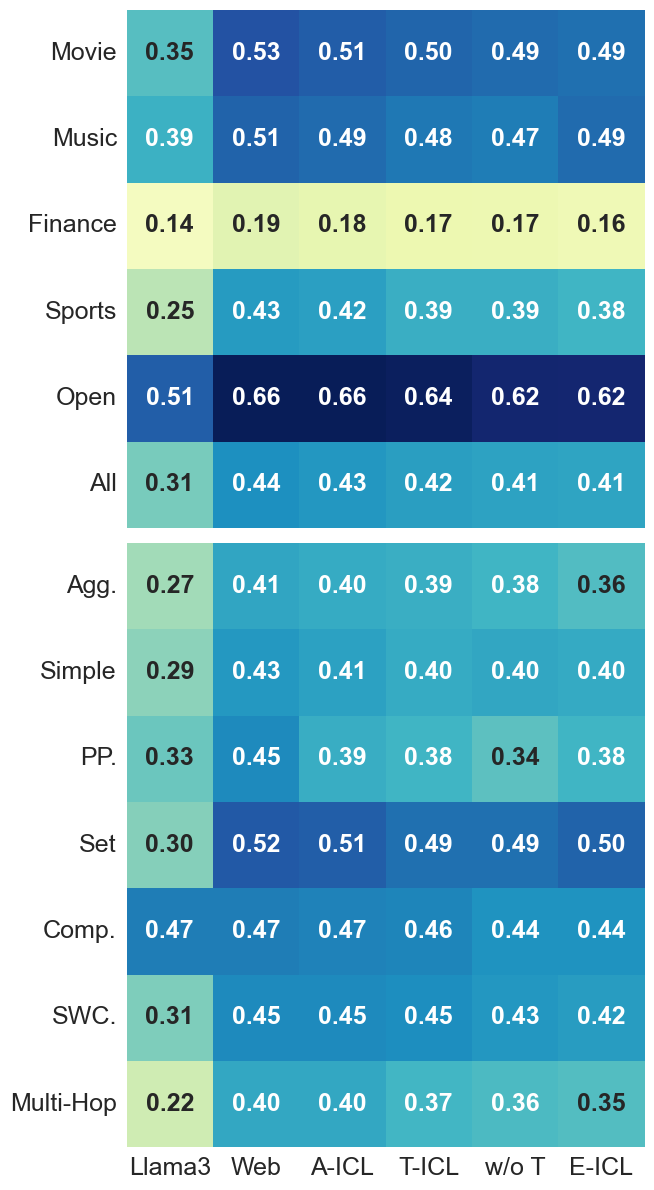

In [47]:
db_domain_data = [
    [0.351, 0.617, 0.591, 0.602, 0.616],
    [0.385, 0.471, 0.425, 0.460, 0.397],
    [0.145, 0.448, 0.347, 0.394, 0.388],
    [0.250, 0.403, 0.352, 0.375, 0.269],
    [0.511, 0.476, 0.485, 0.463, 0.476],
    [0.314, 0.487, 0.441, 0.461, 0.437]
]

db_tasks_data = [
    [0.273, 0.329, 0.338, 0.331, 0.265],
    [0.294, 0.694, 0.613, 0.641, 0.651],
    [0.328, 0.344, 0.328, 0.313, 0.375],
    [0.301, 0.333, 0.333, 0.350, 0.317],
    [0.471, 0.553, 0.476, 0.541, 0.524],
    [0.308, 0.418, 0.343, 0.358, 0.299],
    [0.224, 0.243, 0.280, 0.271, 0.196]
]

plot_heatmap_vertical(db_domain_data, db_tasks_data, 'DB')


wiki_domain_data = [
    [0.351, 0.495, 0.47, 0.495, 0.487, 0.376],
    [0.385, 0.506, 0.471, 0.494, 0.489, 0.443],
    [0.145, 0.114, 0.107, 0.12, 0.114, 0.136],
    [0.25, 0.287, 0.282, 0.287, 0.278, 0.264],
    [0.511, 0.629, 0.572, 0.611, 0.611, 0.537],
    [0.314, 0.385, 0.361, 0.383, 0.376, 0.333]
]

wiki_tasks_data = [
    [0.273, 0.325, 0.331, 0.325, 0.299, 0.286],
    [0.294, 0.400, 0.365, 0.397, 0.390, 0.324],
    [0.328, 0.344, 0.297, 0.359, 0.344, 0.328],
    [0.301, 0.439, 0.374, 0.431, 0.431, 0.350],
    [0.471, 0.506, 0.494, 0.494, 0.494, 0.476],
    [0.308, 0.299, 0.289, 0.294, 0.294, 0.299],
    [0.224, 0.355, 0.346, 0.364, 0.364, 0.262]
]

plot_heatmap_vertical(wiki_domain_data, wiki_tasks_data, 'Wiki')


web_domain_data = [
    [0.351, 0.53, 0.513, 0.502, 0.495, 0.487],
    [0.385, 0.506, 0.494, 0.477, 0.471, 0.494],
    [0.145, 0.192, 0.18, 0.17, 0.167, 0.161],
    [0.25, 0.426, 0.417, 0.389, 0.389, 0.375],
    [0.511, 0.659, 0.655, 0.642, 0.624, 0.62],
    [0.314, 0.444, 0.433, 0.418, 0.412, 0.408]
]

web_tasks_data = [
    [0.273, 0.406, 0.396, 0.39, 0.377, 0.357],
    [0.294, 0.43, 0.415, 0.395, 0.403, 0.397],
    [0.328, 0.453, 0.391, 0.375, 0.344, 0.375],
    [0.301, 0.52, 0.512, 0.488, 0.488, 0.504],
    [0.471, 0.471, 0.465, 0.459, 0.441, 0.441],
    [0.308, 0.453, 0.453, 0.448, 0.433, 0.423],
    [0.224, 0.402, 0.402, 0.374, 0.364, 0.355]
]

plot_heatmap_vertical(web_domain_data, web_tasks_data, 'Web')

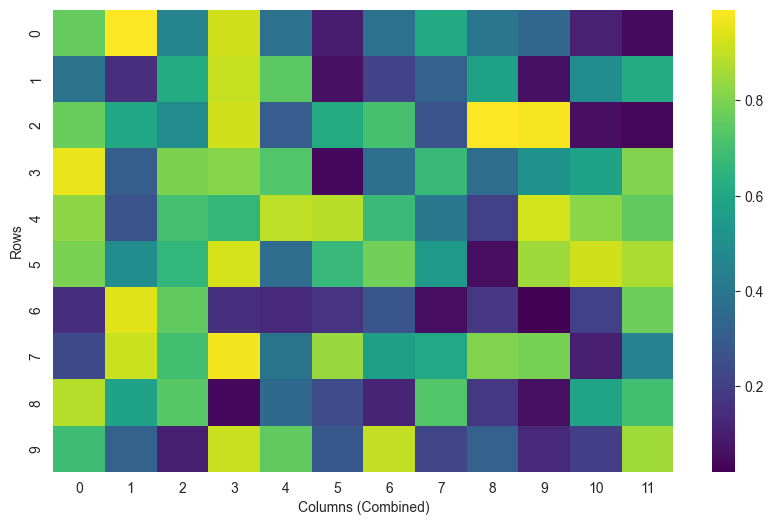

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
n, m, k = 10, 5, 7  # 行数为 n，第一个热力图列数为 m，第二个热力图列数为 k
data1 = np.random.rand(n, m)  # 第一个热力图数据
data2 = np.random.rand(n, k)  # 第二个热力图数据

# 水平拼接两个数据矩阵
combined_data = np.hstack((data1, data2))

# 绘制整体热力图
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data, cmap='viridis', cbar=True)
plt.xlabel('Columns (Combined)')
plt.ylabel('Rows')
plt.show()